In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns

#### Challenge 1 (Inverse & Determinant)

In [2]:
A = np.array([[2,1], [1,2]])
print(np.linalg.inv(A))
print(A@np.linalg.inv(A))

[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
[[1. 0.]
 [0. 1.]]


In [3]:
print(np.linalg.det(A))

2.9999999999999996


In [4]:
B = np.array([[1,2], [2,4]])

print(np.linalg.inv(B))

LinAlgError: Singular matrix

In [5]:
print(np.linalg.det(B))

0.0


A square matrix is invertible if and only if its determinant is non-zero

If det(A)=0, then the denominator becomes zero, making the inverse undefined. A matrix that does not have an inverse is by definition a singular matrix.

#### Challenge 2 (Eigenvalues/Eigenvectors)

In [6]:
S = np.array([[4,1], [1,3]])

eigenvalues, eigenvectors = np.linalg.eig(S)

print(eigenvalues)
print(eigenvectors)

[4.61803399 2.38196601]
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [7]:
print(S@eigenvectors)

[[ 3.92833435 -1.25227364]
 [ 2.42784414  2.02622131]]


In [8]:
print(eigenvalues * eigenvectors)

[[ 3.92833435 -1.25227364]
 [ 2.42784414  2.02622131]]


The core idea behind eigenvectors and eigenvalues is to find special vectors that, when a linear transformation (represented by the matrix) is applied to them, only get scaled, not rotated or flipped in direction


Matrix (A): This represents a linear transformation. When you multiply a vector by A, you are transforming that vector in some way (e.g., rotating, scaling, shearing).

Eigenvector (v): This is a non-zero vector that, after being transformed by matrix A, remains on the same line through the origin as the original vector v. It only changes its length (and possibly its direction by 180 degrees if the scaling factor is negative).

Eigenvalue (λ): This is the scalar (a single number) by which the eigenvector v is scaled. It tells you how much the eigenvector stretches or shrinks (or flips if λ is negative) under the transformation.


The equation that mathematically captures this relationship is:

Av=λv

Explanation of each side:

Left-hand side (Av): This represents the result of applying the linear transformation defined by matrix A to the vector v. It's the standard matrix-vector multiplication.

Right-hand side (λv): This represents the vector v being scaled by the scalar λ. It means every component of v is multiplied by λ.


The equality Av=λv is not a derived property but rather the defining characteristic of an eigenvector and its corresponding eigenvalue. If a vector v and a scalar λ satisfy this equation, then v is by definition an eigenvector of A, and λ is its eigenvalue.

When you multiply the matrix A by its eigenvector v (left side), you get a new vector.

This new vector happens to be exactly the same as if you had just multiplied the original eigenvector v by a single number λ (right side).



#### Mini-Project: Linear Regression with Normal Equation

In [14]:
### Data Generation

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5 # y = 4 + 3x + noise
# Add a bias term (column of ones) to X for the intercept
X_b = np.c_[np.ones((100, 1)), X] # X_b now has shape (100, 2)

In [15]:
#### Implement Normal Equation

# Calculate weights W using the Normal Equation
# W = (X_b.T @ X_b)^-1 @ X_b.T @ y
# Hint: Use np.linalg.inv and @ operator
weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # Your calculation here
print(f"Optimal weights: {weights}")
# Expected output for ideal case should be close to [[4.], [3.]]

Optimal weights: [[4.11107554]
 [2.98423376]]


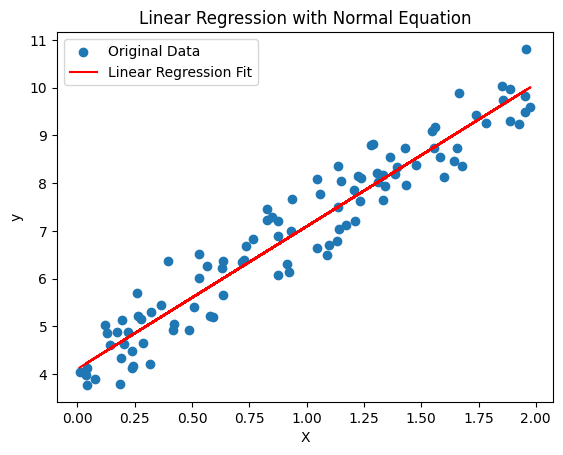

In [16]:
#### Prediction

# Predict y values using the calculated weights
y_pred = X_b @ weights
# Plot X vs y and X vs y_pred to visualize the fit (using matplotlib)
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label='Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Normal Equation')
plt.show()